In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None

In [25]:
df = pd.read_fwf('Ficheros/CME/CME_all.txt', skiprows = 4, header = None)


In [26]:
! cat "Ficheros/CME/CME_all.txt" | head

 ========= SOHO/LASCO CME CATALOG==========      LAST UPDATED: 2020/03/17 11:51
 Date       Time     Central  Width  Linear   2nd order speed      Accel     Mass      Kinetic    MPA   Remarks
                        PA           Speed  initial final   20R                        Energy                 

1996/01/11  00:14:36    267     18    499     571    426      0    -64.3*   -------    -------    272   Only C3
1996/01/13  22:08:30    265     16    290     278    303    372      2.8*   -------    -------    266   Only C3
1996/01/15  07:01:10    262     43    525     600    454      0    -31.1    -------    -------    272   Only C3
1996/01/22  03:11:01    105     37    267     401    130      0   -126.3*   7.1e+13*   2.5e+28*   103   Very Poor Event; Only C3
1996/01/26  09:16:19     90     27    262     254    271    322      1.9*   3.0e+14    1.0e+29     90   Poor Event; Only C3
1996/01/31  06:52:13    274     47    158     219     99      0    -12.3*   2.5e+14*   3.2e+28*   272   Poo

In [27]:
columnas = ['Date', 'Time', 'Central_PA', 'Width', 'L_speed', '2_I_speed', '2_F_speed', '2_20R_speed', 'Acceleration',
           'Mass', 'K_energy', 'MPA', 'Remarks']
df = pd.read_fwf('Ficheros/CME/univ_all.txt', skiprows = 4, header = None, names = columnas, index_col = False,
                na_values = [0, '', '--', '---', '----', '-----', '------', '-------', '********'])

In [28]:
df

,Date,Time,Central_PA,Width,L_speed,2_I_speed,2_F_speed,2_20R_speed,Acceleration,Mass,K_energy,MPA,Remarks
0,1996/01/11,00:14:36,267,18,499.0,571.0,426.0,NaN,-64.3*,NaN,NaN,272.0,Only C3
1,1996/01/13,22:08:30,265,16,290.0,278.0,303.0,372.0,2.8*,NaN,NaN,266.0,Only C3
2,1996/01/15,07:01:10,262,43,525.0,600.0,454.0,NaN,-31.1,NaN,NaN,272.0,Only C3
3,1996/01/22,03:11:01,105,37,267.0,401.0,130.0,NaN,-126.3*,7.1e+13*,2.5e+28*,103.0,Very Poor Event; Only C3
4,1996/01/26,09:16:19,90,27,262.0,254.0,271.0,322.0,1.9*,3.0e+14,1.0e+29,90.0,Poor Event; Only C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30316,2020/05/29,11:24:05,84,52,347.0,406.0,288.0,NaN,-21.9*,NaN,NaN,68.0,Poor Event; Only C2
30317,2020/05/29,15:12:05,83,46,204.0,215.0,193.0,NaN,-2.8*,NaN,NaN,74.0,Poor Event; Only C2
30318,2020/05/29,17:36:05,76,34,210.0,295.0,120.0,NaN,-19.3*,NaN,NaN,73.0,Poor Event; Only C2
30319,2020/05/30,01:25:43,80,39,269.0,203.0,339.0,331.0,2.8,NaN,NaN,86.0,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30321 entries, 0 to 30320
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          30321 non-null  object 
 1   Time          30321 non-null  object 
 2   Central_PA    30273 non-null  object 
 3   Width         30321 non-null  int64  
 4   L_speed       30213 non-null  float64
 5   2_I_speed     28997 non-null  float64
 6   2_F_speed     29756 non-null  float64
 7   2_20R_speed   23256 non-null  float64
 8   Acceleration  29831 non-null  object 
 9   Mass          19738 non-null  object 
 10  K_energy      19706 non-null  object 
 11  MPA           30299 non-null  float64
 12  Remarks       21109 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 3.0+ MB


In [30]:
df.head()

,Date,Time,Central_PA,Width,L_speed,2_I_speed,2_F_speed,2_20R_speed,Acceleration,Mass,K_energy,MPA,Remarks
0,1996/01/11,00:14:36,267,18,499.0,571.0,426.0,NaN,-64.3*,NaN,NaN,272.0,Only C3
1,1996/01/13,22:08:30,265,16,290.0,278.0,303.0,372.0,2.8*,NaN,NaN,266.0,Only C3
2,1996/01/15,07:01:10,262,43,525.0,600.0,454.0,NaN,-31.1,NaN,NaN,272.0,Only C3
3,1996/01/22,03:11:01,105,37,267.0,401.0,130.0,NaN,-126.3*,7.1e+13*,2.5e+28*,103.0,Very Poor Event; Only C3
4,1996/01/26,09:16:19,90,27,262.0,254.0,271.0,322.0,1.9*,3.0e+14,1.0e+29,90.0,Poor Event; Only C3


In [31]:
df.isna().sum()

Date                0
Time                0
Central_PA         48
Width               0
L_speed           108
2_I_speed        1324
2_F_speed         565
2_20R_speed      7065
Acceleration      490
Mass            10583
K_energy        10615
MPA                22
Remarks          9212
dtype: int64

In [32]:
df.Central_PA[df.Central_PA == 'Halo'] = 360

/home/jmpinop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df['Central_PA'] = df['Central_PA'].astype(float)

In [34]:
df['Central_PA'].fillna(method = 'ffill', inplace = True)
df['L_speed'].fillna(method = 'ffill', inplace = True)
df['2_I_speed'].fillna(method = 'ffill', inplace = True)
df['2_F_speed'].fillna(method = 'ffill', inplace = True)
df['2_20R_speed'].fillna(method = 'ffill', inplace = True)
df['2_20R_speed'].fillna(method = 'bfill', inplace = True)
df['Acceleration'].fillna(method = 'ffill', inplace = True)
df['MPA'].fillna(method = 'ffill', inplace = True)

In [35]:
df.drop(['Time'], axis = 'columns', inplace = True)
df.drop(['Remarks'], axis = 'columns', inplace = True)
df.drop(['Mass'], axis = 'columns', inplace = True)
df.drop(['L_speed'], axis = 'columns', inplace = True)

In [36]:
df.dropna(inplace = True)

In [44]:
df['Acceleration'] = df['Acceleration'].str.rstrip('*')
df['Acceleration'] = df['Acceleration'].astype(float)
df['K_energy'] = df['K_energy'].str.rstrip('*')
df['K_energy'] = df['K_energy'].astype(float)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19706 entries, 3 to 30123
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Central_PA    19706 non-null  float64       
 1   Width         19706 non-null  int64         
 2   2_I_speed     19706 non-null  float64       
 3   2_F_speed     19706 non-null  float64       
 4   2_20R_speed   19706 non-null  float64       
 5   Acceleration  19706 non-null  float64       
 6   K_energy      19706 non-null  float64       
 7   MPA           19706 non-null  float64       
 8   Date2         19706 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 1.5 MB


In [46]:
df

,Central_PA,Width,2_I_speed,2_F_speed,2_20R_speed,Acceleration,K_energy,MPA,Date2
3,105.0,37,401.0,130.0,372.0,-126.3,2.500000e+28,103.0,1996-01-22
4,90.0,27,254.0,271.0,322.0,1.9,1.000000e+29,90.0,1996-01-26
5,274.0,47,219.0,99.0,322.0,-12.3,3.200000e+28,272.0,1996-01-31
6,83.0,52,294.0,317.0,309.0,0.9,8.900000e+29,80.0,1996-02-03
7,263.0,70,247.0,126.0,309.0,-6.0,2.700000e+28,249.0,1996-02-08
...,...,...,...,...,...,...,...,...,...
30116,99.0,58,196.0,104.0,1903.0,-11.1,9.200000e+27,109.0,2019-12-26
30119,302.0,21,62.0,779.0,2036.0,171.2,1.200000e+28,296.0,2019-12-27
30121,284.0,46,488.0,405.0,136.0,-9.1,5.900000e+28,289.0,2019-12-27
30122,277.0,39,29.0,75.0,195.0,1.6,6.900000e+27,278.0,2019-12-30


In [47]:
df['Date2'] = pd.to_datetime(df['Date'])

KeyError: 'Date'

In [41]:
df.drop(['Date'], axis = 'columns', inplace = True)


In [48]:
df

,Central_PA,Width,2_I_speed,2_F_speed,2_20R_speed,Acceleration,K_energy,MPA,Date2
3,105.0,37,401.0,130.0,372.0,-126.3,2.500000e+28,103.0,1996-01-22
4,90.0,27,254.0,271.0,322.0,1.9,1.000000e+29,90.0,1996-01-26
5,274.0,47,219.0,99.0,322.0,-12.3,3.200000e+28,272.0,1996-01-31
6,83.0,52,294.0,317.0,309.0,0.9,8.900000e+29,80.0,1996-02-03
7,263.0,70,247.0,126.0,309.0,-6.0,2.700000e+28,249.0,1996-02-08
...,...,...,...,...,...,...,...,...,...
30116,99.0,58,196.0,104.0,1903.0,-11.1,9.200000e+27,109.0,2019-12-26
30119,302.0,21,62.0,779.0,2036.0,171.2,1.200000e+28,296.0,2019-12-27
30121,284.0,46,488.0,405.0,136.0,-9.1,5.900000e+28,289.0,2019-12-27
30122,277.0,39,29.0,75.0,195.0,1.6,6.900000e+27,278.0,2019-12-30


In [49]:
df.dtypes

Central_PA             float64
Width                    int64
2_I_speed              float64
2_F_speed              float64
2_20R_speed            float64
Acceleration           float64
K_energy               float64
MPA                    float64
Date2           datetime64[ns]
dtype: object

In [50]:
df = df.rename(columns={'Date2':'Date'})

In [51]:
grouped = df.groupby('Date')

In [52]:
grouped2 = grouped.mean()

In [53]:
grouped.mean().reset_index

<bound method DataFrame.reset_index of             Central_PA  Width  2_I_speed  2_F_speed  2_20R_speed  \
Date                                                               
1996-01-22       105.0   37.0      401.0      130.0        372.0   
1996-01-26        90.0   27.0      254.0      271.0        322.0   
1996-01-31       274.0   47.0      219.0       99.0        322.0   
1996-02-03        83.0   52.0      294.0      317.0        309.0   
1996-02-08       263.0   70.0      247.0      126.0        309.0   
...                ...    ...        ...        ...          ...   
2019-12-24       282.0   57.0      157.0      288.0        615.0   
2019-12-25       274.0   49.0      337.0      245.0       1903.0   
2019-12-26        99.0   58.0      196.0      104.0       1903.0   
2019-12-27       293.0   33.5      275.0      592.0       1086.0   
2019-12-30       266.5   61.0       20.5      132.0        222.5   

            Acceleration      K_energy    MPA  
Date                        

In [54]:
grouped2 =grouped2.reset_index()

In [109]:
grouped2.describe()

,Central_PA,Width,2_I_speed,2_F_speed,2_20R_speed,Acceleration,K_energy,MPA
count,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6.256000e+03,6256.000000
mean,184.154648,67.070023,338.898134,376.105490,510.757097,2.045669,2.250056e+30,180.480505
std,73.003171,42.328968,180.462608,161.407945,210.548846,12.572121,5.345381e+30,72.085152
min,1.000000,11.000000,2.000000,9.000000,21.000000,-64.000000,5.500000e+24,1.000000
25%,126.666667,40.000000,207.500000,264.000000,362.000000,-3.500000,6.538781e+28,122.000000
50%,185.437500,56.666667,308.600000,357.000000,485.416667,1.900000,3.700000e+29,181.333333
75%,243.000000,80.350000,441.050000,466.000000,627.297619,7.000000,1.754470e+30,239.000000
max,360.000000,360.000000,1037.500000,995.000000,1395.000000,64.200000,4.903000e+31,359.000000


In [94]:
len(grouped2[grouped2['2_I_speed'] > 1050])

33

In [96]:
grouped2.drop(grouped2[grouped2['2_I_speed'] >= 1050].index, inplace =True)

In [99]:
len(grouped2[grouped2['2_F_speed'] > 1000])

24

In [100]:
grouped2.drop(grouped2[grouped2['2_F_speed'] >= 1000].index, inplace =True)

In [101]:
len(grouped2[grouped2['2_20R_speed'] > 1400])

76

In [102]:
grouped2.drop(grouped2[grouped2['2_20R_speed'] >= 1400].index, inplace =True)

In [103]:
len(grouped2[grouped2['Acceleration'] > 65])

22

In [104]:
grouped2.drop(grouped2[grouped2['Acceleration'] > 65].index, inplace =True)

In [66]:
len(grouped2[grouped2['Acceleration'] < -65])

36

In [105]:
grouped2.drop(grouped2[grouped2['Acceleration'] < -65].index, inplace =True)

In [113]:
grouped2.drop(['Acceleration'], axis = 'columns', inplace = True)

In [106]:
grouped2.drop(grouped2[grouped2.K_energy >= 0.5e+32].index, inplace =True)

In [107]:
len(grouped2[grouped2['K_energy'] > 0.5e+32])

0

In [114]:
grouped2.dtypes

Date           datetime64[ns]
Central_PA            float64
Width                 float64
2_I_speed             float64
2_F_speed             float64
2_20R_speed           float64
K_energy              float64
MPA                   float64
dtype: object

In [115]:
grouped2.isna().sum()

Date           0
Central_PA     0
Width          0
2_I_speed      0
2_F_speed      0
2_20R_speed    0
K_energy       0
MPA            0
dtype: int64

In [116]:
grouped2.to_csv('CME_new.csv', index = False)

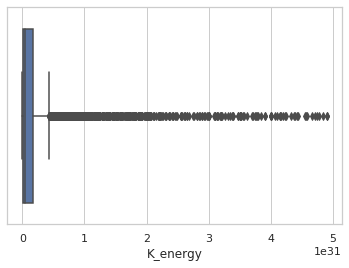

In [117]:
sns.set(style="whitegrid")
sns.boxplot(x = grouped2['K_energy'])